# Regresja wielomianowa

In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas

%matplotlib inline

In [2]:
# Przydatne funkcje

def cost(theta, X, y):
    """Wersja macierzowa funkcji kosztu"""
    m = len(y)
    J = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return J.item()

def gradient(theta, X, y):
    """Wersja macierzowa gradientu funkcji kosztu"""
    return 1.0 / len(y) * (X.T * (X * theta - y)) 

def gradient_descent(fJ, fdJ, theta, X, y, alpha=0.1, eps=10**-7):
    """Algorytm gradientu prostego (wersja macierzowa)"""
    current_cost = fJ(theta, X, y)
    logs = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) > 10**15:
            print('Algorithm does not converge!')
            break
        if abs(prev_cost - current_cost) <= eps:
            break
        logs.append([current_cost, theta]) 
    return theta, logs

def plot_data(X, y, xlabel, ylabel):
    """Wykres danych (wersja macierzowa)"""
    fig = plt.figure(figsize=(16*.6, 9*.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.scatter([X[:, 1]], [y], c='r', s=50, label='Dane')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(.05, .05)
    plt.ylim(y.min() - 1, y.max() + 1)
    plt.xlim(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1)
    return fig

def plot_fun(fig, fun, X):
    """Wykres funkcji `fun`"""
    ax = fig.axes[0]
    x0 = np.min(X[:, 1]) - 1.0
    x1 = np.max(X[:, 1]) + 1.0
    Arg = np.arange(x0, x1, 0.1)
    Val = fun(Arg)
    return ax.plot(Arg, Val, linewidth='2')

In [3]:
def MSE(Y_true, Y_pred):
    return np.square(np.subtract(Y_true,Y_pred)).mean()

In [4]:
# Funkcja regresji wielomianowej

def h_poly(Theta, x):
    """Funkcja wielomianowa"""
    return sum(theta * np.power(x, i) for i, theta in enumerate(Theta.tolist()))

def get_poly_data(data, deg):
    m, n_plus_1 = data.shape
    n = n_plus_1 - 1

    X1 = data[:, 0:n]
    X1 /= np.amax(X1, axis=0)

    Xs = [np.ones((m, 1)), X1]

    for i in range(2, deg+1):
        Xn = np.power(X1, i)
        Xn /= np.amax(Xn, axis=0)
        Xs.append(Xn)

    X = np.matrix(np.concatenate(Xs, axis=1)).reshape(m, deg * n + 1)

    y = np.matrix(data[:, -1]).reshape(m, 1)

    return X, y


def polynomial_regression(X, y, n):
    """Funkcja regresji wielomianowej"""
    theta_start = np.matrix([0] * (n+1)).reshape(n+1, 1)
    theta, logs = gradient_descent(cost, gradient, theta_start, X, y)
    return lambda x: h_poly(theta, x)

In [5]:
def predict_values(model, data, n):
    x, y = get_poly_data(np.array(data), n)
    preprocessed_x = []
    for i in x:
        preprocessed_x.append(i.item(1))
    return y, model(preprocessed_x), MSE(y, model(preprocessed_x))

def plot_and_mse(data, data_test, n):
    x, y = get_poly_data(np.array(data), n)
    model = polynomial_regression(x, y, n)
    
    fig = plot_data(x, y, xlabel='x', ylabel='y')
    plot_fun(fig, polynomial_regression(x, y, n), x)

    y_true, Y_pred, mse = predict_values(model, data_test, n)
    print(f'Wielomian {n} stopnia, MSE = {mse}')

In [6]:
# Wczytanie danych (mieszkania) przy pomocy biblioteki pandas

alldata = pandas.read_csv('data_flats.tsv', header=0, sep='\t',
                          usecols=['price', 'rooms', 'sqrMetres'])
alldata = alldata[['sqrMetres', 'price']]
alldata = alldata.sample(frac=1)
alldata

sqrMetres      price
470          40  1140000.0
1171         90   855000.0
1128         37   288405.0
254          49   290000.0
508          91   375606.0
...         ...        ...
389          56   325000.0
1403         69   399000.0
957          94   595000.0
356          53   339200.0
160          44   349668.0

[1674 rows x 2 columns]

In [7]:
# alldata = np.matrix(alldata[['sqrMetres', 'price']])
data_train = alldata[0:1600]
data_test = alldata[1600:]
data_train = np.matrix(data_train).astype(float)
data_test = np.matrix(data_test).astype(float)

Wielomian 1 stopnia, MSE = 34232245972.377033
Wielomian 2 stopnia, MSE = 84918416526.0791
Wielomian 3 stopnia, MSE = 83924720748.3686


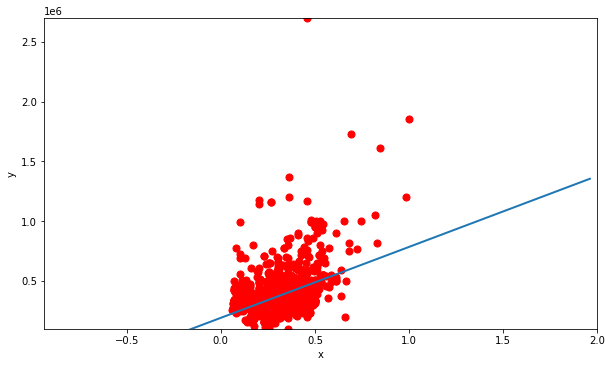

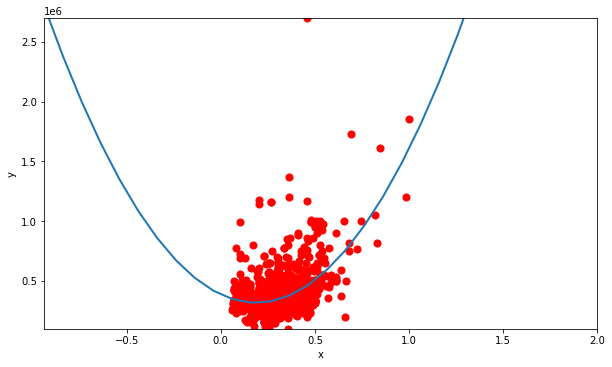

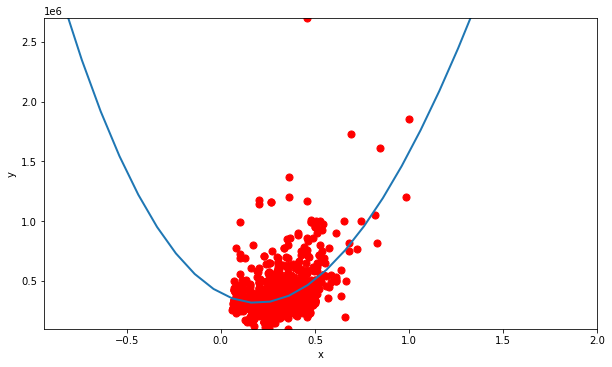

In [8]:
for n in range(1, 4):
    plot_and_mse(data_train, data_test, n) 

In [145]:
# Ilość nauki do oceny

In [9]:
data_marks_all = pandas.read_csv('Student_Marks.csv')
data_marks_all

number_courses  time_study   Marks
0                3       4.508  19.202
1                4       0.096   7.734
2                4       3.133  13.811
3                6       7.909  53.018
4                8       7.811  55.299
..             ...         ...     ...
95               6       3.561  19.128
96               3       0.301   5.609
97               4       7.163  41.444
98               7       0.309  12.027
99               3       6.335  32.357

[100 rows x 3 columns]

In [10]:
data_marks_all = data_marks_all[['time_study', 'Marks']]
# data_marks_all = data_marks_all.sample(frac=1)
data_marks_train = data_marks_all[0:70]
data_marks_test = data_marks_all[70:]
data_marks_train = np.matrix(data_marks_train).astype(float)
data_marks_test = np.matrix(data_marks_test).astype(float)

Wielomian 1 stopnia, MSE = 381.1693728350544
Wielomian 2 stopnia, MSE = 394.1863119057109
Wielomian 3 stopnia, MSE = 391.50171107305584


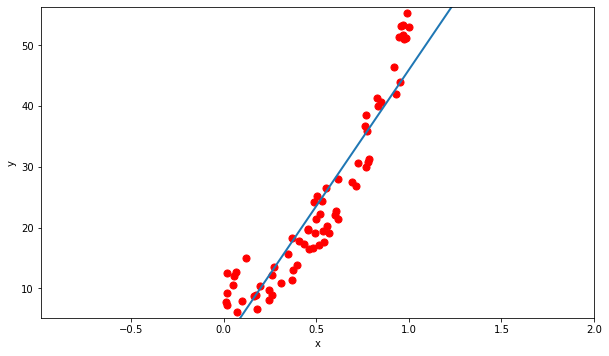

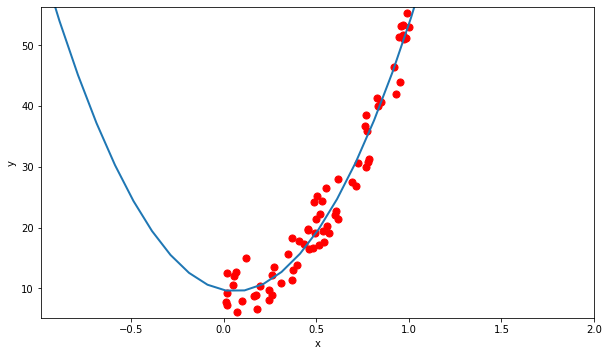

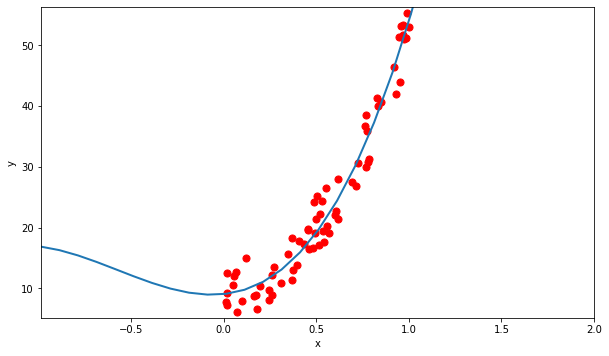

In [17]:
for n in range(1, 4):
    plot_and_mse(data_marks_train, data_marks_test, n) 

In [13]:
data_ins = pandas.read_csv('insurance.csv')
data_ins = data_ins.sample(frac=1)
data_ins

age     sex     bmi  children smoker     region      charges
955    31    male  39.490         1     no  southeast   3875.73410
644    43    male  35.310         2     no  southeast  18806.14547
1210   36    male  30.875         1     no  northwest   5373.36425
260    58  female  25.200         0     no  southwest  11837.16000
740    45    male  24.035         2     no  northeast   8604.48365
...   ...     ...     ...       ...    ...        ...          ...
808    18    male  30.140         0     no  southeast   1131.50660
301    53  female  22.610         3    yes  northeast  24873.38490
664    64  female  22.990         0    yes  southeast  27037.91410
989    24  female  20.520         0    yes  northeast  14571.89080
1121   46    male  38.170         2     no  southeast   8347.16430

[1338 rows x 7 columns]

In [14]:
data_ins = data_ins[['age', 'charges']]
data_ins_train = data_ins[0:1200]
data_ins_test = data_ins[1200:]
data_ins_train = np.matrix(data_ins_train).astype(float)
data_ins_test = np.matrix(data_ins_test).astype(float)

Wielomian 1 stopnia, MSE = 195836517.14979035
Wielomian 2 stopnia, MSE = 196081038.617658
Wielomian 3 stopnia, MSE = 196407183.82186848


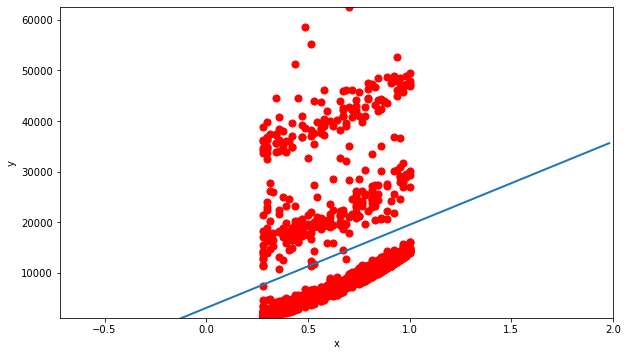

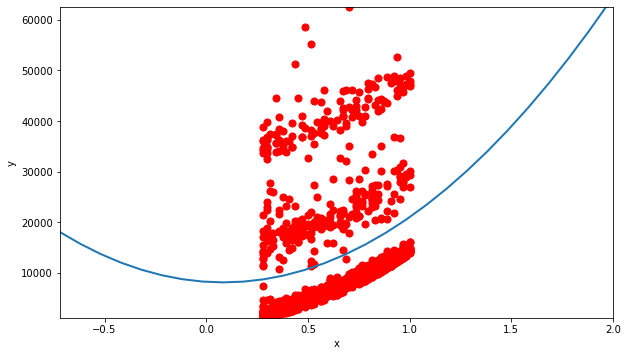

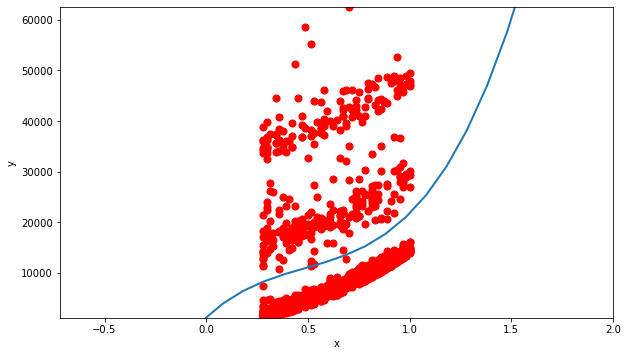

In [15]:
for n in range(1, 4):
    plot_and_mse(data_ins_train, data_ins_test, n) 